# KNN

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [5]:
for i in range(len(iris.target_names)):
    print(f"Label {i} - {iris.target_names[i]}")

Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica


In [6]:
k = 2
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [8]:
print(confusion_matrix(y_test, y_pred))

[[7 0 0]
 [0 5 0]
 [0 1 2]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3

    accuracy                           0.93        15
   macro avg       0.94      0.89      0.90        15
weighted avg       0.94      0.93      0.93        15



# PCA

### Cancer Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
cancer = load_breast_cancer()

In [12]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
for i in range(len(cancer.target_names)):
    print(f"Label {i} - {cancer.target_names[i]}")

Label 0 - malignant
Label 1 - benign


In [15]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

In [18]:
scaled_data.shape

(569, 30)

In [19]:
x_pca.shape

(569, 2)

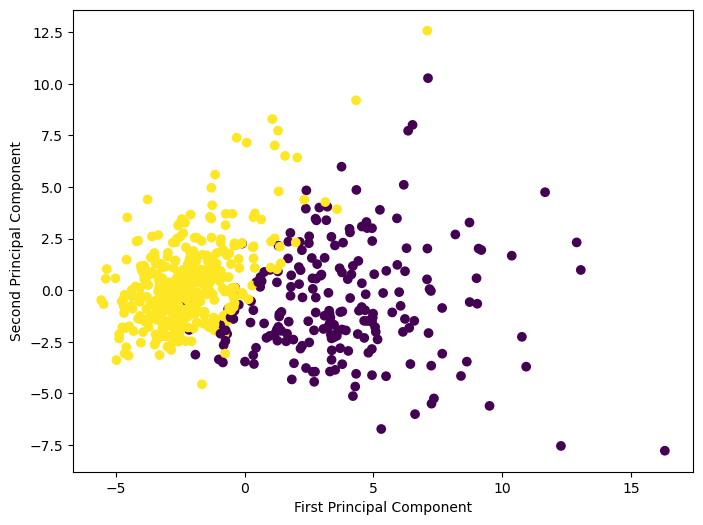

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer.target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### Iris Dataset

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np

In [22]:
np.random.seed(5)

In [23]:
iris = load_iris()

In [24]:
X = iris.data
y = iris.target

In [25]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X)

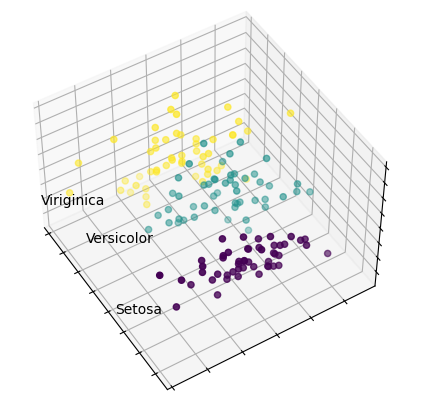

In [26]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d', elev=48, azim=148)

ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=y)

for name,label in [("Setosa", 0), ("Versicolor", 1), ("Viriginica", 2)]:
    ax.text3D(
        x_pca[y == label, 0].mean(),
        x_pca[y == label, 1].mean() + 1.5,
        x_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
    )

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Linear Regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
np.random.seed(0)

In [29]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
linear = LinearRegression()
linear.fit(X_train, y_train);

In [32]:
y_pred = linear.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

0.9177532469714291

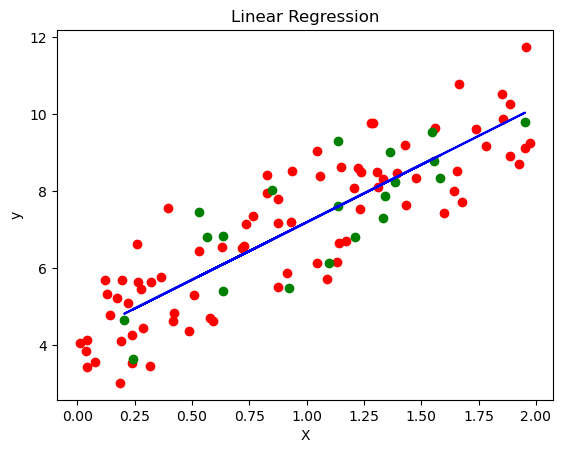

In [34]:
plt.scatter(X_train, y_train, c='red')
plt.scatter(X_test, y_test, c='green')
plt.plot(X_test, y_pred, c='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Logistic Regression

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
iris = load_iris()
X = iris.data
y = iris.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train);

In [40]:
y_pred = logistic.predict(X_test)

In [41]:
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [42]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# Naive Bayes

### Iris Dataset

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);

In [47]:
y_pred = gnb.predict(X_test)

In [48]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [49]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Cancer Dataset

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [54]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);

In [55]:
y_pred = gnb.predict(X_test)

In [56]:
print(accuracy_score(y_test, y_pred))

0.9473684210526315


In [57]:
print(confusion_matrix(y_test, y_pred))

[[38  4]
 [ 2 70]]


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Text Classifier

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
msg = pd.read_csv('document.csv', names=['message', 'label'])
msg['labelnum'] = msg.label.map({'pos':1, 'neg':0})
msg.sample(5)

,message,label,labelnum
3,This is my best work,pos,1
1,This is an amazing place,pos,1
11,I do not like the taste of this juice,neg,0
12,I love to dance,pos,1
6,I am tired of this stuff,neg,0


In [61]:
X = msg.message
y = msg.labelnum

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
count_vect = CountVectorizer()
x_train_dtm = count_vect.fit_transform(X_train)
x_test_dtm = count_vect.transform(X_test)
print(f"Number of features extracted = {x_train_dtm.shape[1]}")

Number of features extracted = 46


In [64]:
df = pd.DataFrame(x_train_dtm.toarray(), columns=count_vect.get_feature_names_out())
df.head()

,about,am,amazing,an,and,awesome,bad,beers,best,boss,...,these,this,tired,to,today,very,went,what,with,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [65]:
classifier = MultinomialNB()
classifier.fit(x_train_dtm, y_train);

In [66]:
y_pred = classifier.predict(x_test_dtm)

In [67]:
for doc, p in zip(X_test, y_pred):
    pred = 'pos' if p==1 else 'neg'
    print(f"{doc} -> {pred}")

I am tired of this stuff -> neg
I love to dance -> neg
What an awesome view -> pos
We will have good fun tomorrow -> pos
I love this sandwich -> neg


In [68]:
print(accuracy_score(y_test, y_pred))

0.6


In [69]:
print(confusion_matrix(y_test, y_pred))

[[1 0]
 [2 2]]


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



# Perceptron

In [71]:
def activation(out, threshold):
    return 1 if out >= threshold else 0

def perceptron(original, inputs):
    a = [0,0,1,1]
    b = [0,1,0,1]
    y = original
    w = [1.4, 1.5]
    threshold = 1
    learning_rate = 0.1
    i = 0
    print("Perceptron Training")
    print("###################")
    print("-------------------")
    while i<4:
        summation = a[i]*w[0] + b[i]*w[1]
        output = activation(summation, threshold)
        print(f"Inputs: {a[i]}, {b[i]}")
        print(f"Weights: {w[0]}, {w[1]}")
        print(f"Summation: {summation}, Threshold: {threshold}")
        print(f"Actual Output: {y[i]}, Predicted Output: {output}")
        if y[i] != output:
            print("_________\nUpdating Weights")
            w[0] += learning_rate*(y[i] - output)*a[i]
            w[1] += learning_rate*(y[i] - output)*b[i]
            print(f"Updated Weights: {w[0]}, {w[1]}")
            i-=1
            print("\nWeights Updated. Training Again:")
            print("##################################")
        i+=1
        print("------------------------")
    
    summation = inputs[0]*w[0] + inputs[1]*w[1]
    return activation(summation, threshold)

In [72]:
and_input = [1,1]
and_original = [0,0,0,1]
print(f"AND Gate Output for {and_input}: {perceptron(and_original, and_input)}")

Perceptron Training
###################
-------------------
Inputs: 0, 0
Weights: 1.4, 1.5
Summation: 0.0, Threshold: 1
Actual Output: 0, Predicted Output: 0
------------------------
Inputs: 0, 1
Weights: 1.4, 1.5
Summation: 1.5, Threshold: 1
Actual Output: 0, Predicted Output: 1
_________
Updating Weights
Updated Weights: 1.4, 1.4

Weights Updated. Training Again:
##################################
------------------------
Inputs: 0, 1
Weights: 1.4, 1.4
Summation: 1.4, Threshold: 1
Actual Output: 0, Predicted Output: 1
_________
Updating Weights
Updated Weights: 1.4, 1.2999999999999998

Weights Updated. Training Again:
##################################
------------------------
Inputs: 0, 1
Weights: 1.4, 1.2999999999999998
Summation: 1.2999999999999998, Threshold: 1
Actual Output: 0, Predicted Output: 1
_________
Updating Weights
Updated Weights: 1.4, 1.1999999999999997

Weights Updated. Training Again:
##################################
------------------------
Inputs: 0, 1
Weights: 

In [73]:
or_input = [0,0]
or_original = [0,1,1,1]
print(f"OR Gate Output for {or_input}: {perceptron(or_original, or_input)}")

Perceptron Training
###################
-------------------
Inputs: 0, 0
Weights: 1.4, 1.5
Summation: 0.0, Threshold: 1
Actual Output: 0, Predicted Output: 0
------------------------
Inputs: 0, 1
Weights: 1.4, 1.5
Summation: 1.5, Threshold: 1
Actual Output: 1, Predicted Output: 1
------------------------
Inputs: 1, 0
Weights: 1.4, 1.5
Summation: 1.4, Threshold: 1
Actual Output: 1, Predicted Output: 1
------------------------
Inputs: 1, 1
Weights: 1.4, 1.5
Summation: 2.9, Threshold: 1
Actual Output: 1, Predicted Output: 1
------------------------
OR Gate Output for [0, 0]: 0


# Singular Value Decomposition (SVD)

#### Example 1

In [74]:
import numpy as np

A = np.random.rand(5,3)

U, S, VT = np.linalg.svd(A, full_matrices=False)

k = 2

U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

A_reconstructed = U_k@S_k@VT_k

print("Original Matrix:\n",A)
print("Reconstructed Matrix:\n",A_reconstructed)

Original Matrix:
 [[0.96193638 0.29214753 0.24082878]
 [0.10029394 0.01642963 0.92952932]
 [0.66991655 0.78515291 0.28173011]
 [0.58641017 0.06395527 0.4856276 ]
 [0.97749514 0.87650525 0.33815895]]
Reconstructed Matrix:
 [[ 0.75787687  0.54091022  0.30640718]
 [ 0.18465949 -0.08641782  0.90241685]
 [ 0.81581037  0.60729822  0.23484435]
 [ 0.45032556  0.22985184  0.52936097]
 [ 1.05461677  0.78248863  0.31337445]]


#### Example 2

In [75]:
import numpy as np

A = np.array([[3,3,2], [2,3,-2]])

U, S, VT = np.linalg.svd(A, full_matrices=False)

A_reconstructed = U@(np.diag(S))@VT

print("U:\n", U)
print("S:\n", S)
print("VT:\n", VT)

print("Original Matrix:\n",A)
print("Reconstructed Matrix:\n",A_reconstructed)

U:
 [[ 0.7815437 -0.6238505]
 [ 0.6238505  0.7815437]]
S:
 [5.54801894 2.86696457]
VT:
 [[ 0.64749817  0.7599438   0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]]
Original Matrix:
 [[ 3  3  2]
 [ 2  3 -2]]
Reconstructed Matrix:
 [[ 3.  3.  2.]
 [ 2.  3. -2.]]


#### Example 3

In [76]:
import numpy as np

A = np.array([[1, 2, 3],
             [4, 5, 6], 
             [7, 8, 9],
             [10, 11, 12]])

U, S, VT = np.linalg.svd(A, full_matrices=False)

A_reconstructed = U@(np.diag(S))@VT
#### Example 2
print("U:\n", U)
print("S:\n", S)
print("VT:\n", VT)

print("Original Matrix:\n",A)
print("Reconstructed Matrix:\n",A_reconstructed)

U:
 [[-0.14087668  0.82471435  0.54482013]
 [-0.34394629  0.42626394 -0.76839925]
 [-0.54701591  0.02781353 -0.09766188]
 [-0.75008553 -0.37063688  0.321241  ]]
S:
 [2.54624074e+01 1.29066168e+00 1.76998476e-15]
VT:
 [[-0.50453315 -0.5745157  -0.64449826]
 [-0.76077568 -0.05714052  0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]
Original Matrix:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Reconstructed Matrix:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


# Linear Discriminant Analysis (LDA)

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
dataset.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
72,6.3,2.5,4.9,1.5,1
79,5.7,2.6,3.5,1.0,1
85,6.0,3.4,4.5,1.6,1
59,5.2,2.7,3.9,1.4,1
89,5.5,2.5,4.0,1.3,1


In [79]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [80]:
scaler = StandardScaler()
le = LabelEncoder()
X = scaler.fit_transform(X)
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

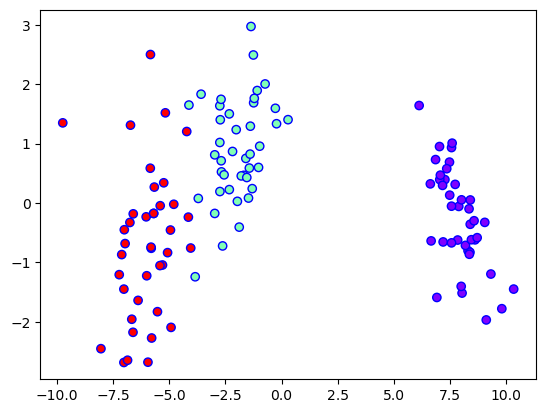

In [82]:
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='rainbow', edgecolors='b')
plt.show()

In [83]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [84]:
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# Backpropagation

In [85]:
import numpy as np

x = np.array(([2,9], [1,5], [3,6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
x = x/np.amax(x, axis=0)
y = y/100

In [86]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivatives_sigmoid(x):
    return x*(1-x)

In [87]:
epoch = 5000
lr = 0.1
n_in = 2
n_hidden = 3
n_out = 1

In [88]:
w_hidden = np.random.uniform(size=(n_in, n_hidden))
b_hidden = np.random.uniform(size=(1, n_hidden))
w_out = np.random.uniform(size=(n_hidden, n_out))
b_out = np.random.uniform(size=(1, n_out))

In [89]:
for i in range(epoch):
    # forward pass
    hidden_input1 = x @ w_hidden
    hidden_input = hidden_input1 + b_hidden
    hidden_layer_act = sigmoid(hidden_input)
    
    out_input_1 = hidden_layer_act @ w_out
    out_input = out_input_1 + b_out
    output = sigmoid(out_input)
    
    # backpropagation
    error_output = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = error_output * outgrad
    
    error_hidden = d_output @ w_out.T
    hiddengrad = derivatives_sigmoid(hidden_layer_act)
    d_hidden = error_hidden * hiddengrad
    
    # weight updation
    w_out += (hidden_layer_act.T @ d_output) * lr
    w_hidden += (x.T @ d_hidden) * lr

In [90]:
print("Input:\n", x)
print("Actual output:\n", y)
print("Predicted output:\n", output)

Input:
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output:
 [[0.92]
 [0.86]
 [0.89]]
Predicted output:
 [[0.89492813]
 [0.88016681]
 [0.89445001]]
